<a href="https://colab.research.google.com/github/sonu9479/Cardiovascular-risk-prediction-classification-project/blob/main/Cardiovascular_risk_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike sharing demand prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Vivek Singh
**Cohort -** London



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Github link - https://github.com/sonu9479/Cardiovascular-risk-prediction-classification-project

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [70]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [154]:
# Loading Dataset using Github link.
Data_url = 'https://github.com/sonu9479/Cardiovascular-risk-prediction-classification-project/raw/main/data_cardiovascular_risk.csv'
data = pd.read_csv(Data_url, encoding= 'unicode_escape')

### Dataset First View

In [72]:
# Dataset First Look
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [73]:
# Dataset Rows & Columns count
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 3390 rows and 17 columns


### Dataset Information

In [74]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [75]:
# Dataset Duplicate Value Count
print(f'There are {len(data[data.duplicated()])} duplicate values in dataset.')

# As we can see there are no duplicate values in the Dataset.

There are 0 duplicate values in dataset.


#### Missing Values/Null Values

In [76]:
# Missing Values/Null Values Count
data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

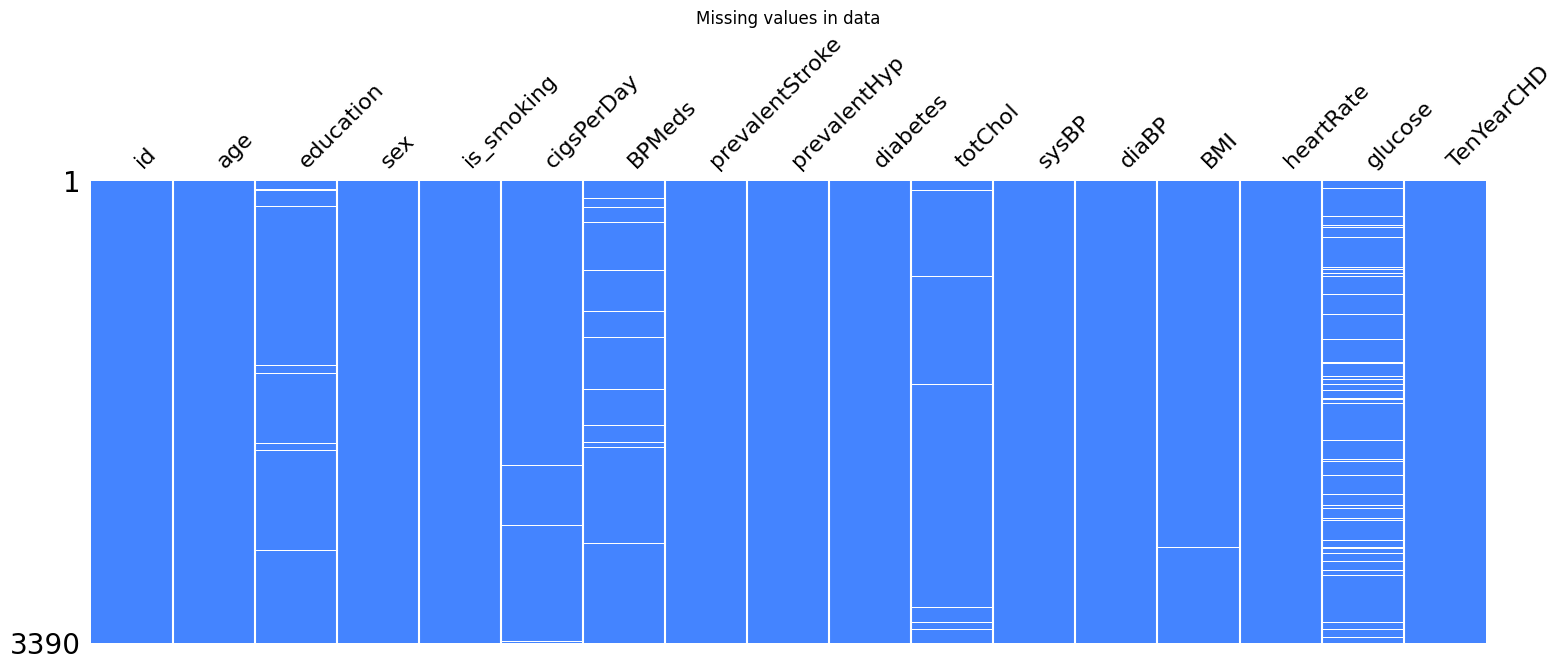

In [77]:
# Visualizing the missing values
import missingno as msno

# Create the missingness matrix
msno.matrix(data, figsize=(18, 6), sparkline=False, color=(0.27, 0.52, 1.0))
plt.title('Missing values in data')
# Display the plot
plt.show()

### What did you know about your dataset?

1)Null values/missing values- 510

2)Dataset has 3390 rows and 17 columns

3)No duplicate Values found in dataset.

4)Columns to convert into numeric(for modelling Purpose)
  
*   sex
*   is_smoking

## ***2. Understanding Your Variables***

In [78]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [79]:
# Dataset Describe
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

Answer Here

**'id'**: This column represents an identifier or unique identifier for each individual in the dataset.

**'age'**: It represents the age of the individual in years.

**'education'**: This column represents the education level of the individual, which could be encoded categorically (e.g., high school, college, postgraduate) or numerically (e.g., years of education completed).

**'sex'**: It indicates the biological sex of the individual, typically encoded as binary values (e.g., 0 for female, 1 for male).

**'is_smoking'**: This column indicates whether the individual is currently smoking or not, typically encoded as binary values (e.g., 0 for non-smoker, 1 for smoker).

**'cigsPerDay'**: It represents the number of cigarettes smoked per day by the individual.

**'BPMeds'**: This column indicates whether the individual is taking blood pressure medication, typically encoded as binary values (e.g., 0 for not taking medication, 1 for taking medication).

**'prevalentStroke'**: It indicates whether the individual has a history of stroke, typically encoded as binary values (e.g., 0 for no stroke history, 1 for stroke history).

**'prevalentHyp'**: This column indicates whether the individual has prevalent hypertension (high blood pressure), typically encoded as binary values (e.g., 0 for no hypertension, 1 for hypertension).

**'diabetes'**: It indicates whether the individual has diabetes, typically encoded as binary values (e.g., 0 for no diabetes, 1 for diabetes).

**'totChol'**: This column represents the total cholesterol level of the individual in mg/dL (milligrams per deciliter).

**'sysBP'**: It represents the systolic blood pressure of the individual in mmHg (millimeters of mercury).

**'diaBP'**: This column represents the diastolic blood pressure of the individual in mmHg.

**'BMI'**: It indicates the body mass index of the individual, which is a measure of body fat based on height and weight.

**'heartRate'**: This column represents the resting heart rate of the individual in beats per minute.

**'glucose'**: It represents the blood glucose (sugar) level of the individual in mg/dL.

**'TenYearCHD'**: This column indicates the presence or absence of the ten-year risk of developing coronary heart disease (CHD) for the individual, typically encoded as binary values (e.g., 0 for no risk, 1 for risk).


### Check Unique Values for each variable.

In [80]:
# Checking Unique Values for each variable
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

### 1. Handling Missing Values

In [81]:
# Handling Missing Values & Missing Value Imputation

# Checking null values.
data.isna().sum().sort_values(ascending = False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

In [82]:
# Checking missing value percentage columnwise.

def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


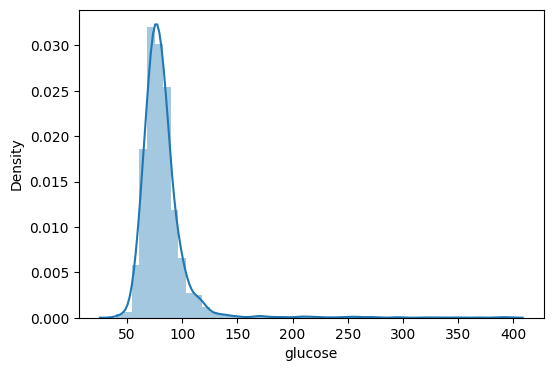

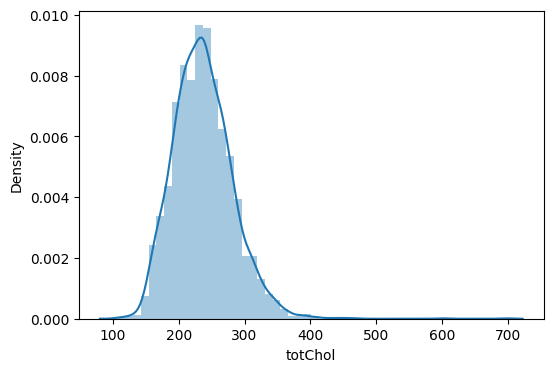

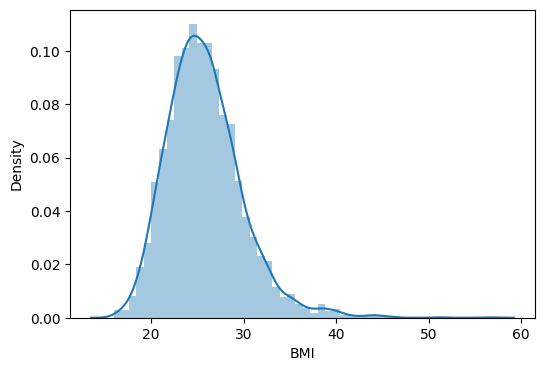

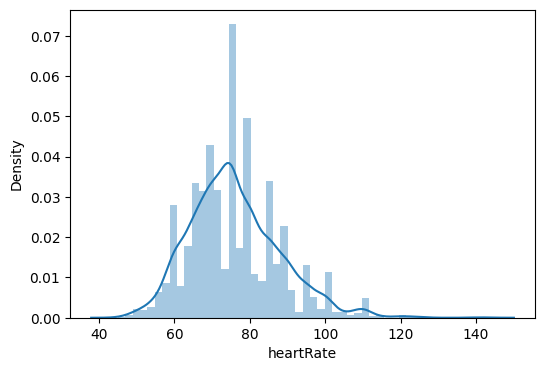

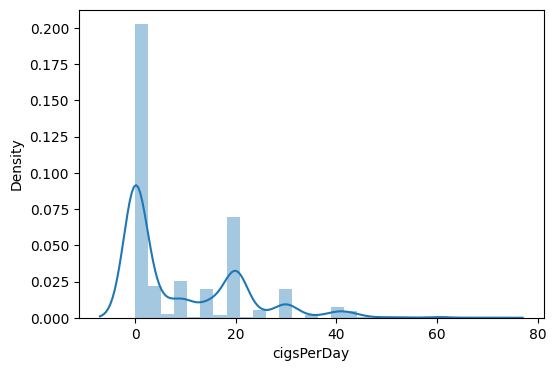

In [83]:
# Visualizing data distribution of the numerical columns which have missing values.

for i in ['glucose','totChol','BMI','heartRate','cigsPerDay']:
  plt.figure(figsize = (6,4))
  sns.distplot(data[i])

In [158]:
# Data is skewed so imputing numerical missing values with median.
data['glucose']= data['glucose'].fillna(data['glucose'].median())

data['totChol']= data['totChol'].fillna(data['totChol'].median())

data['BMI']= data['BMI'].fillna(data['BMI'].median())

data['heartRate']= data['heartRate'].fillna(data['heartRate'].median())

data['cigsPerDay']= data['cigsPerDay'].fillna(data['cigsPerDay'].median())

In [159]:
# Imputing categorical missing data with mode.

data['education']= data['education'].fillna(data['education'].mode()[0])

data['BPMeds']= data['BPMeds'].fillna(data['BPMeds'].mode()[0])


In [86]:
# Checking null values again.

data.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As most of the numerical missing value column data is skewed, so I imputed the missing values with median, and for categorical columns I used mode for imputing missing values.

##*2. Dividing numerical and categorical data*

In [87]:
data.describe().columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [155]:
# Dropping 'id' column as it doesn't serve any purpose in dataset.

data = data.drop(columns = 'id')

In [89]:
# finding categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))


There are 2 categorical variables


In [90]:
# finding Numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables'.format(len(numerical)))


There are 14 numerical variables


In [91]:
discreet = []
for var in data.columns:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discreet.append(var)
        
print('There are {} discreet variables'.format(len(discreet)))

education  values:  [2. 4. 1. 3.]
sex  values:  ['F' 'M']
is_smoking  values:  ['YES' 'NO']
BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
TenYearCHD  values:  [1 0]
There are 8 discreet variables


In [92]:
continuous = [var for var in data.columns if var not in discreet and var not in ['TenYearCHD']]

In [93]:
continuous

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

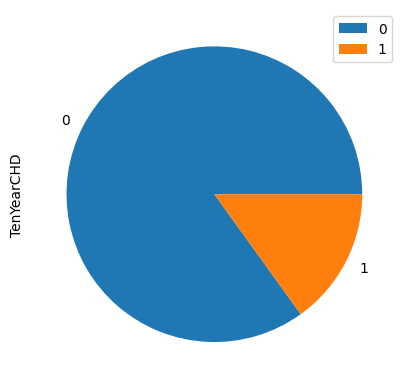

In [94]:
# Chart - 1 visualization code
data['TenYearCHD'].value_counts().plot.pie()
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

<Axes: xlabel='education'>

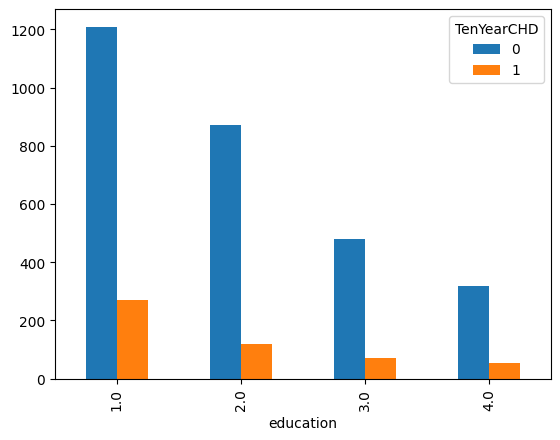

In [95]:
# Chart - 2 visualization code
data.groupby('TenYearCHD')['education'].value_counts().unstack(0).plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: xlabel='sex'>

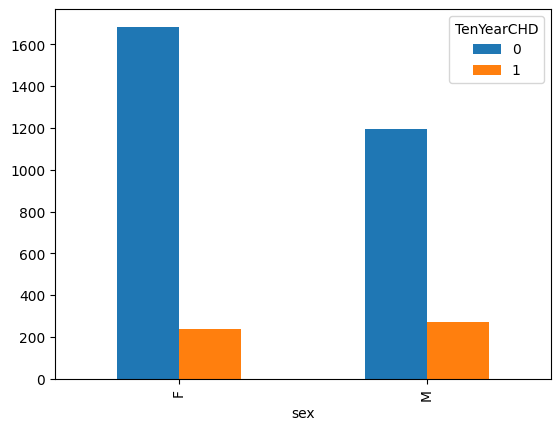

In [96]:
# Chart - 3 visualization code
data.groupby('TenYearCHD')['sex'].value_counts().unstack(0).plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


#### Chart - 4

<Axes: xlabel='is_smoking'>

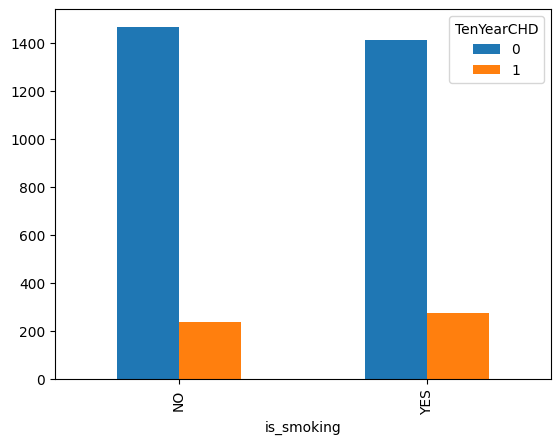

In [98]:
# Chart - 4 visualization code
data.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0).plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='BPMeds'>

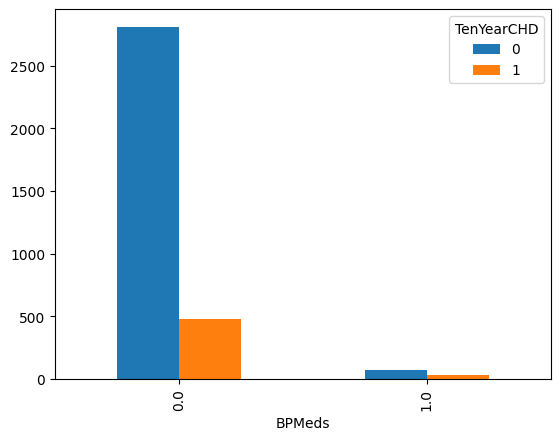

In [99]:
data.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0).plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='prevalentStroke'>

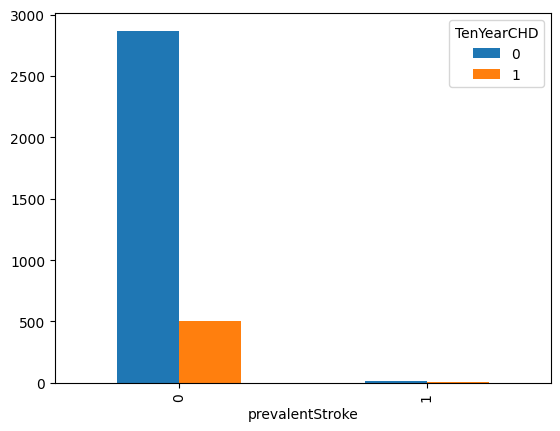

In [100]:
# Chart - 6 visualization code
data.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0).plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: xlabel='diabetes'>

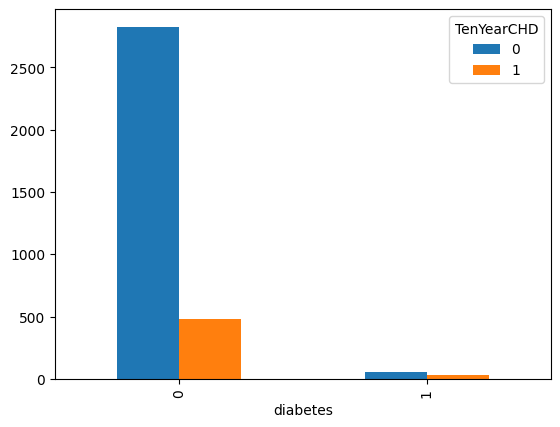

In [101]:
# Chart - 7 visualization code
data.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0).plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='prevalentHyp'>

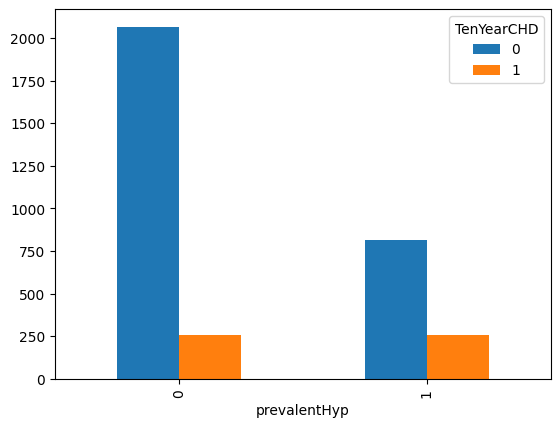

In [102]:
# Chart - 8 visualization code

data.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0).plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

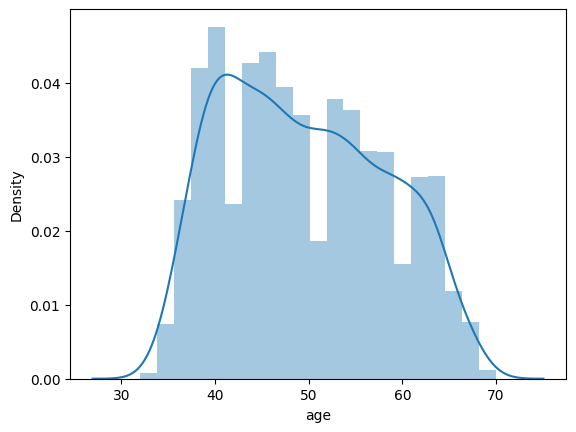

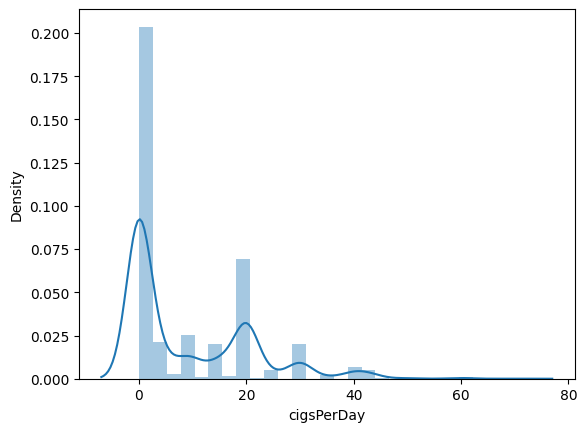

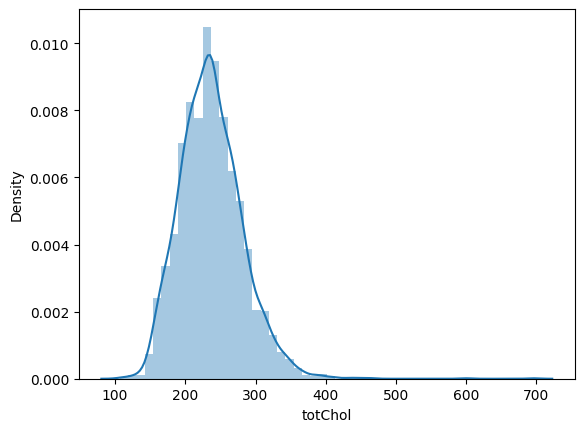

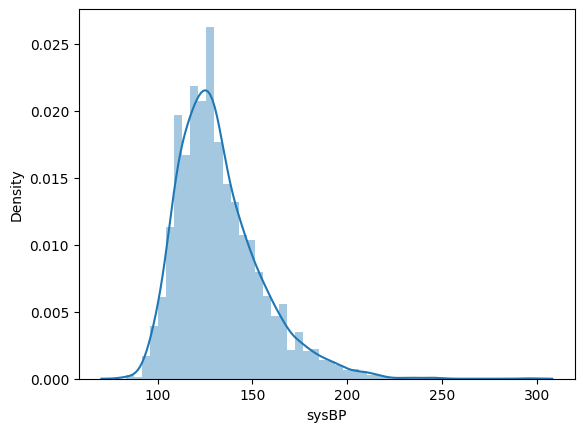

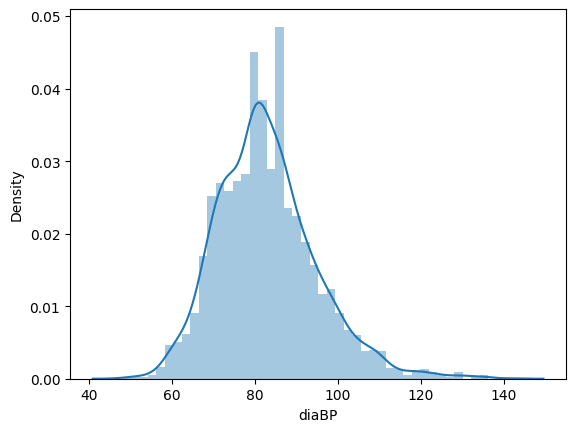

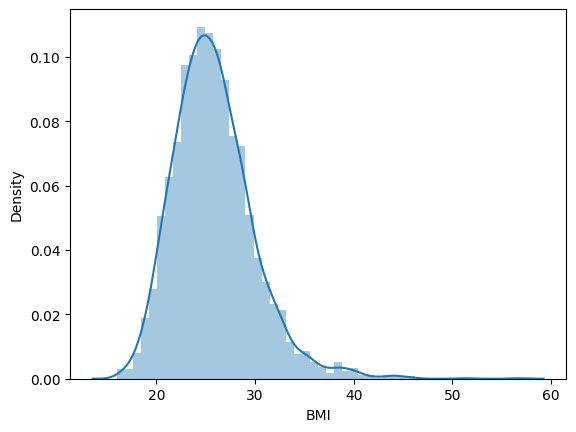

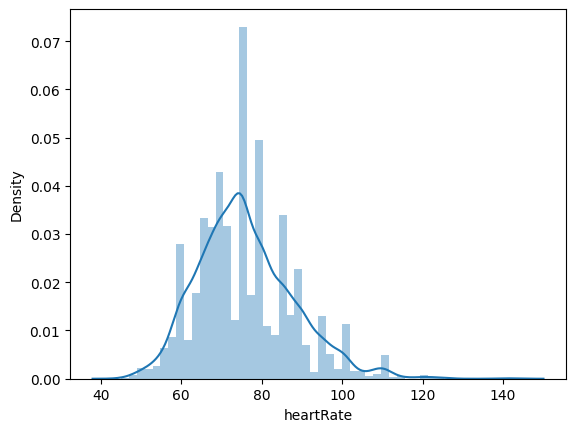

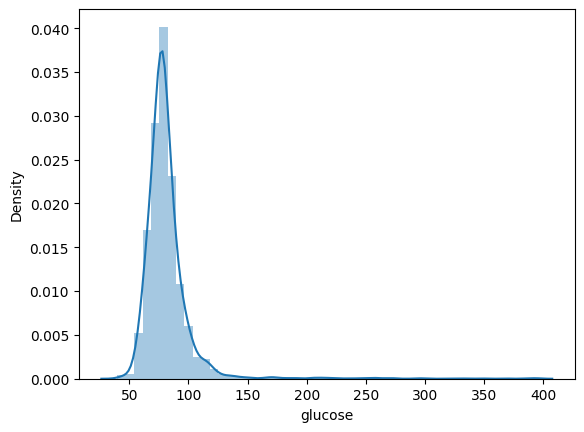

In [103]:
#Chart - 9 visualization code
for i in continuous:
  if i not in ['TenYearCHD']:
    plt.figure()
    sns.distplot(data[i])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: xlabel='sex', ylabel='BMI'>

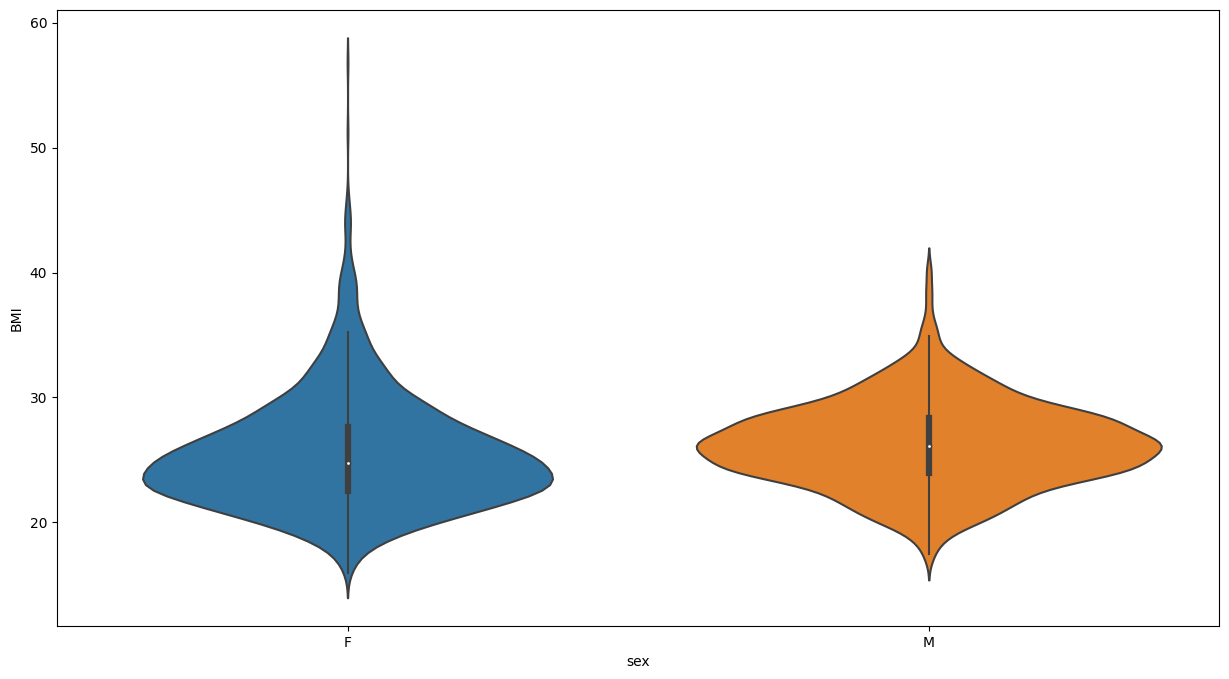

In [104]:
# Chart - 10 visualization code
plt.figure(figsize = (15,8))
sns.violinplot(x = 'sex', y = 'BMI', data = data)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: xlabel='sex,cigsPerDay'>

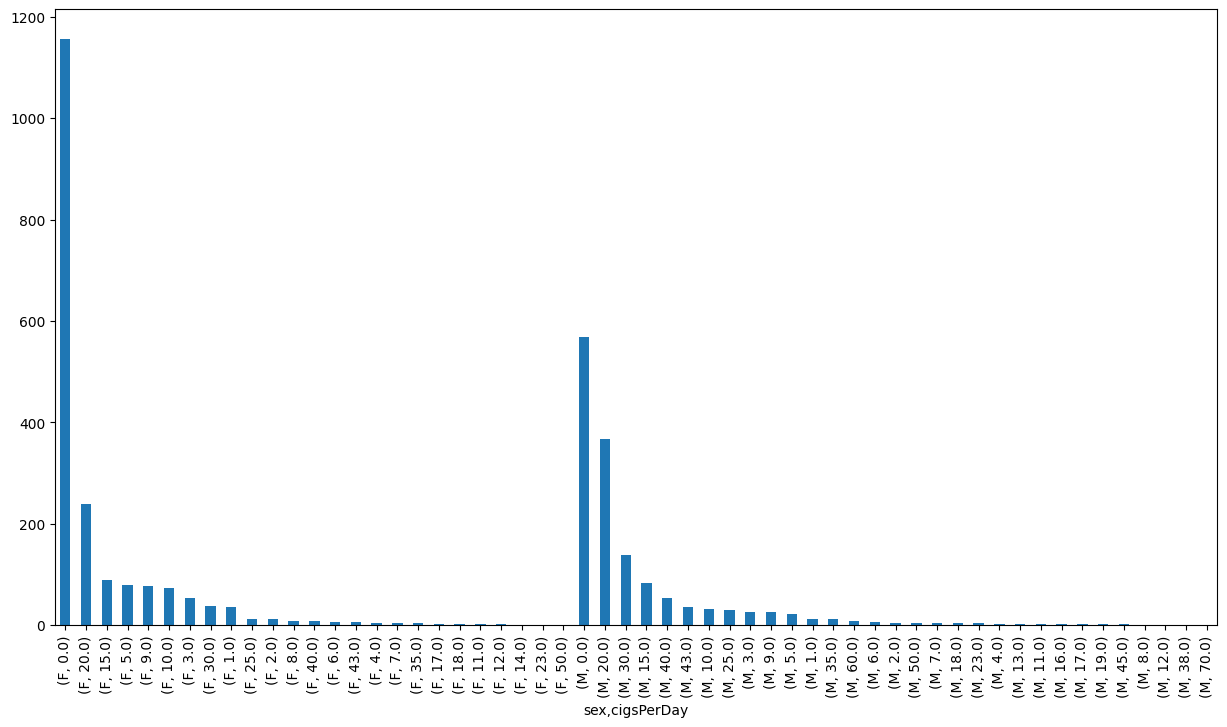

In [105]:
# Chart - 11 visualization code
plt.figure(figsize = (15,8))
data.groupby('sex')['cigsPerDay'].value_counts().plot.bar()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: xlabel='sex', ylabel='sysBP'>

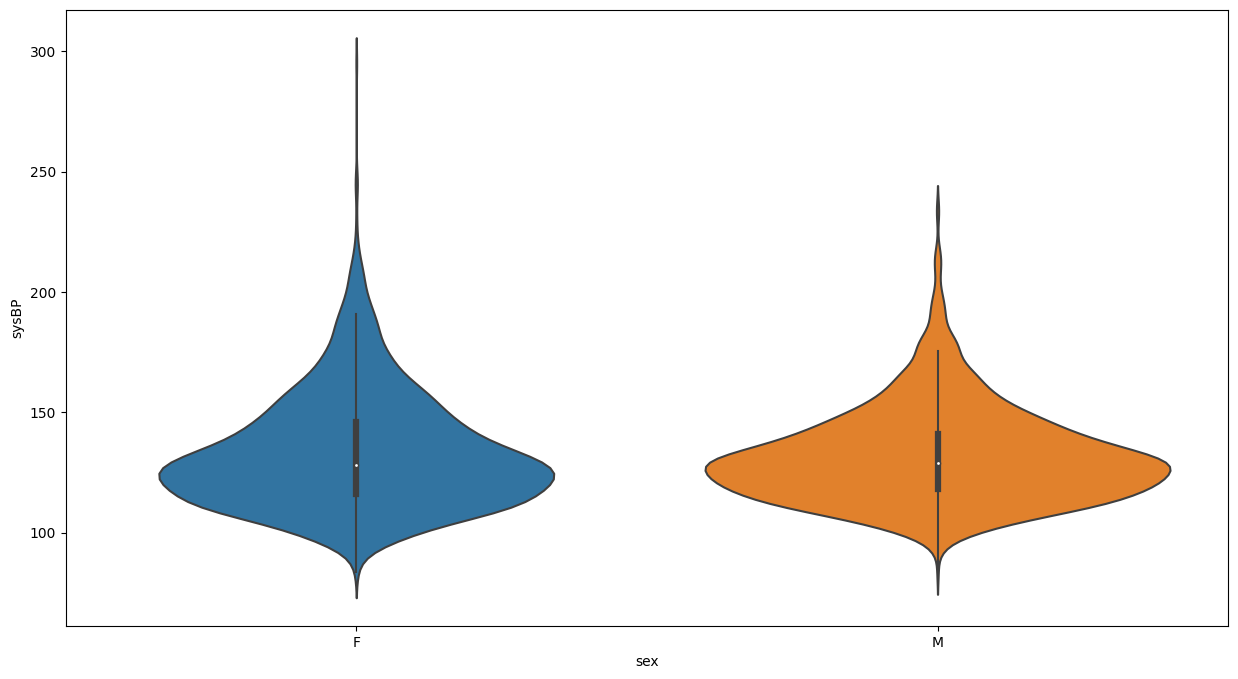

In [106]:
# Chart - 12 visualization code
plt.figure(figsize = (15,8))
sns.violinplot(x = 'sex', y = 'sysBP', data = data)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

<Axes: xlabel='diabetes', ylabel='glucose'>

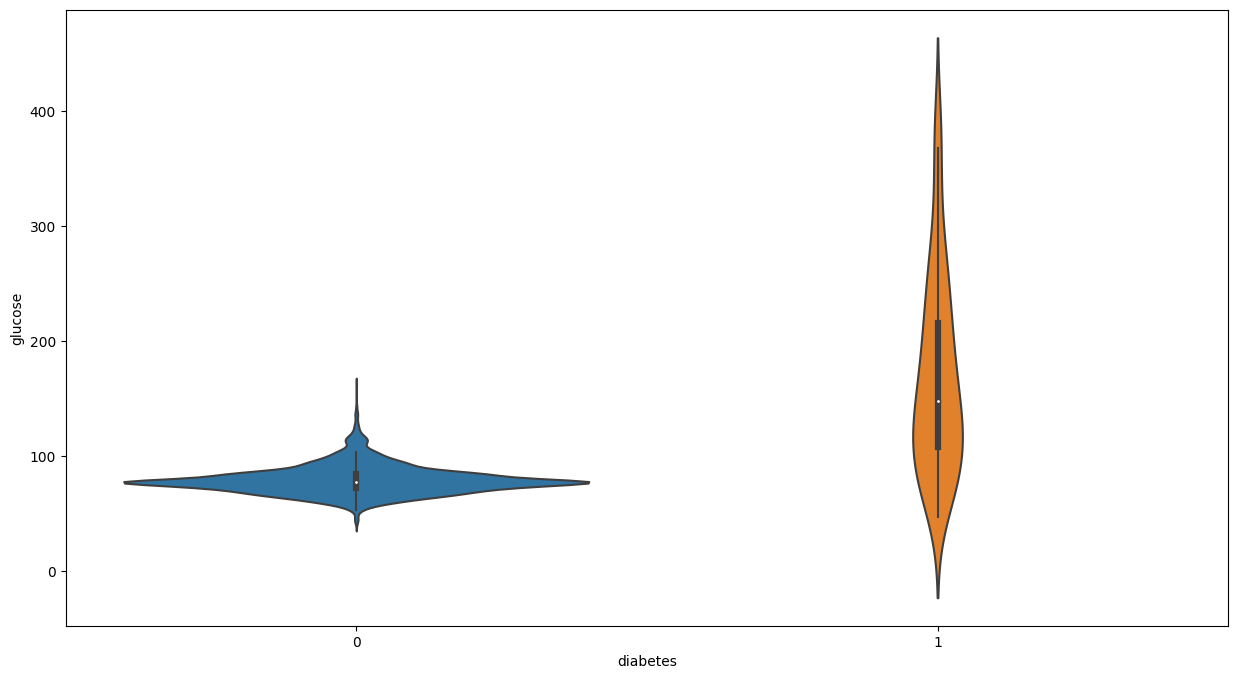

In [107]:
# Chart - 13 visualization code
plt.figure(figsize = (15,8))
sns.violinplot(x = 'diabetes', y = 'glucose', data = data)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

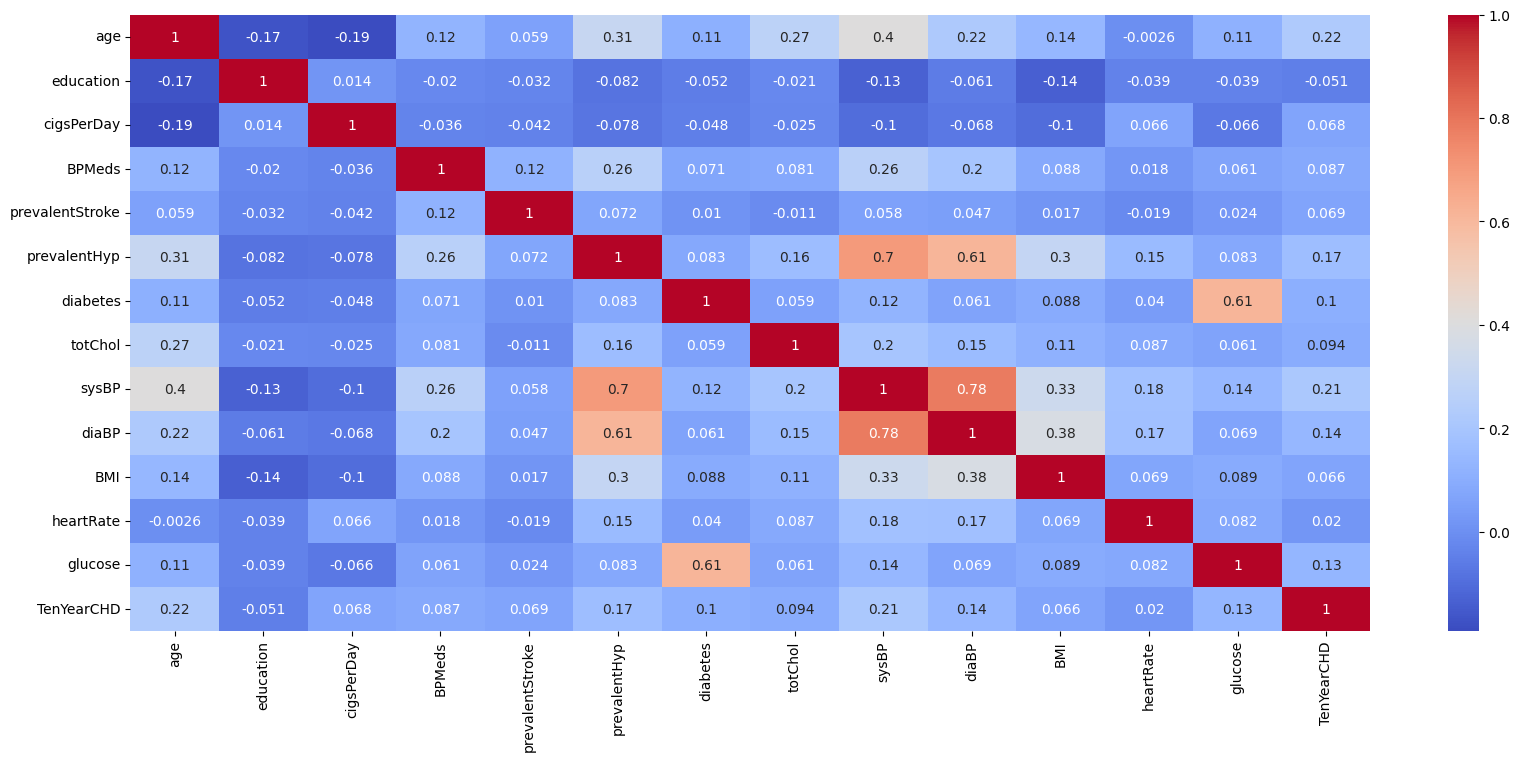

In [108]:
# Correlation Heatmap visualization code

plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

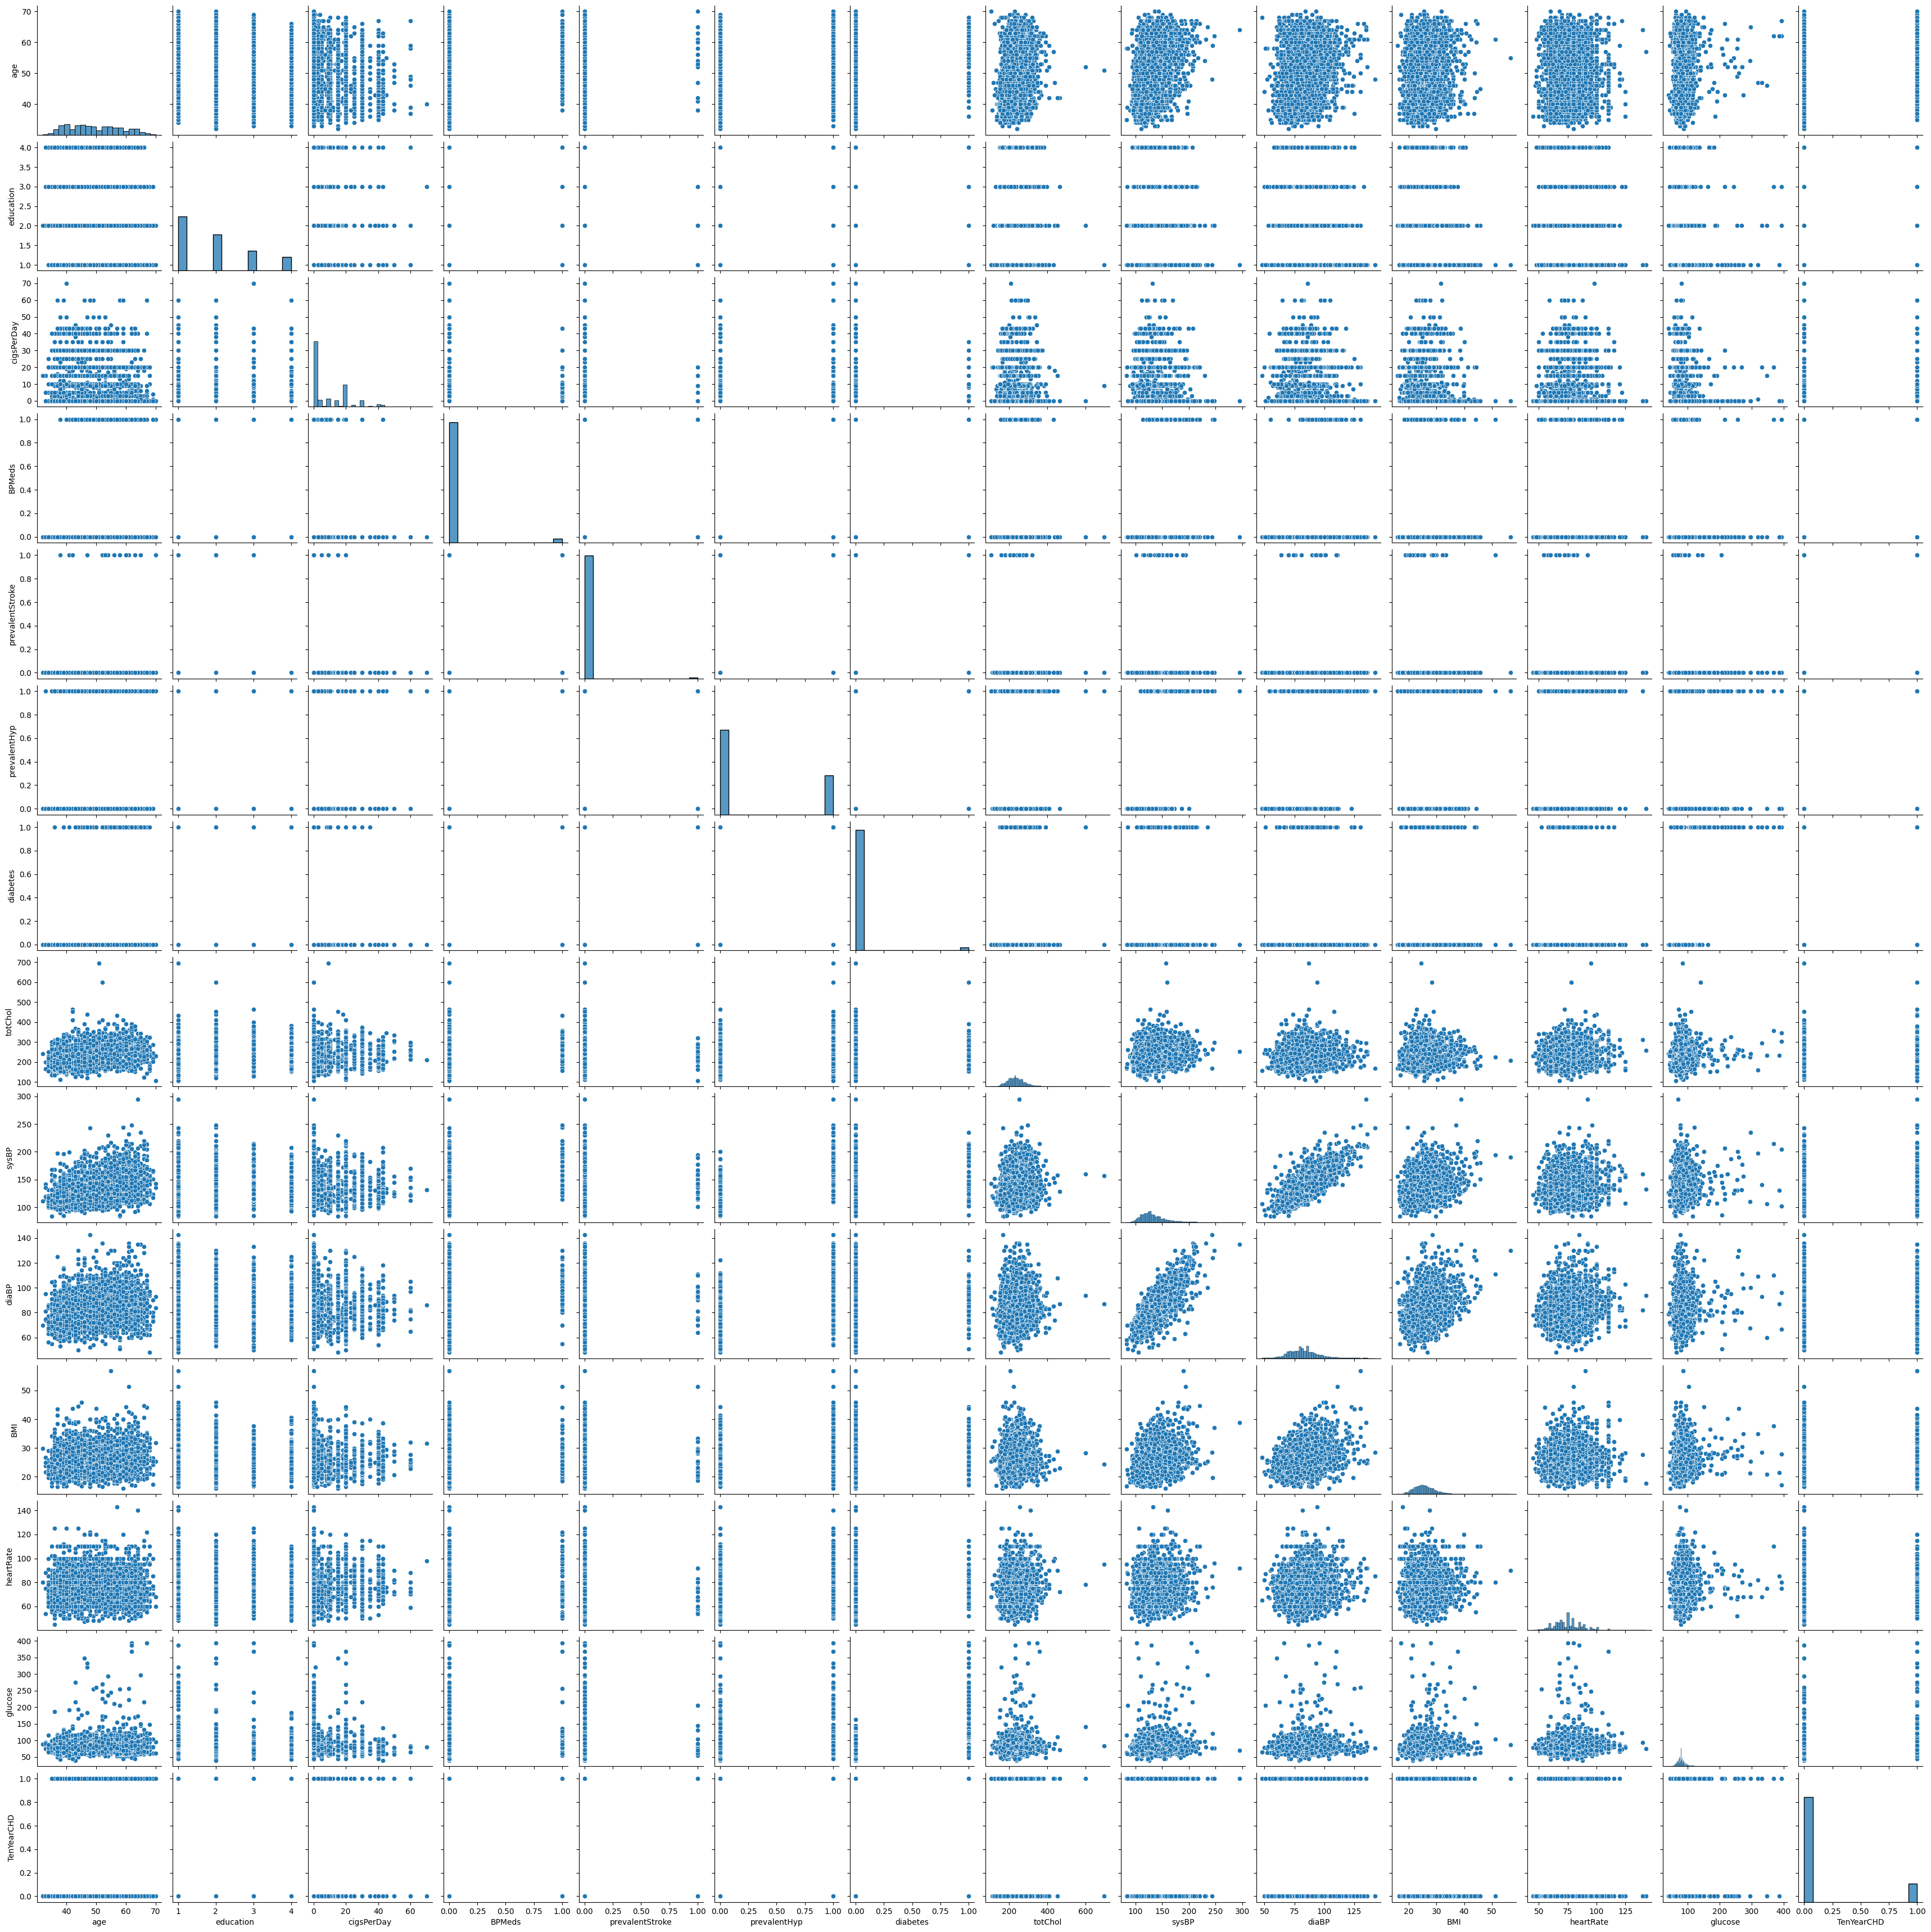

In [109]:
# Pair Plot visualization code

sns.pairplot(data)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [110]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [111]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [112]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

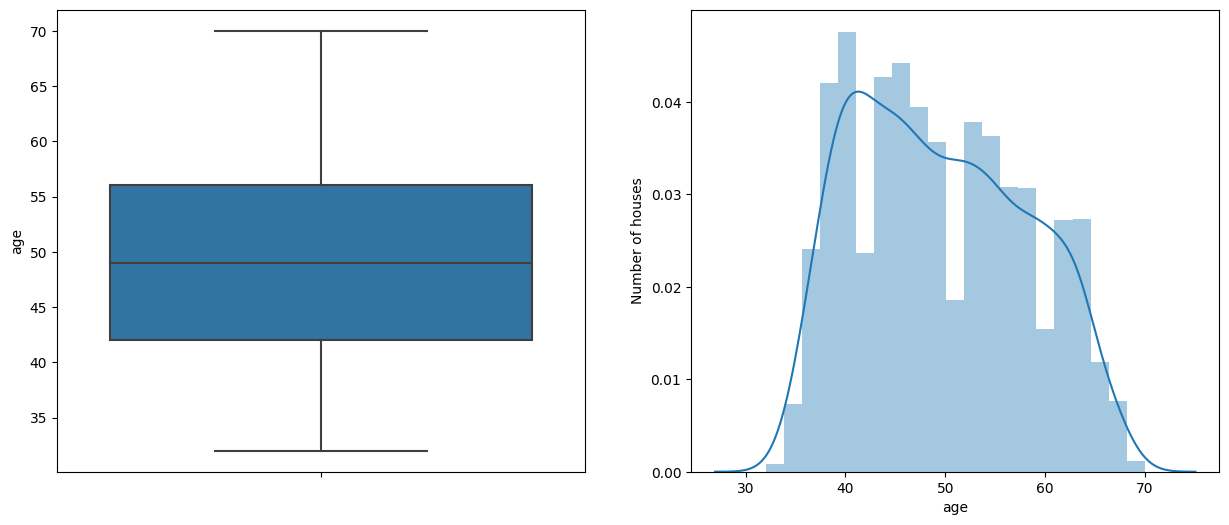

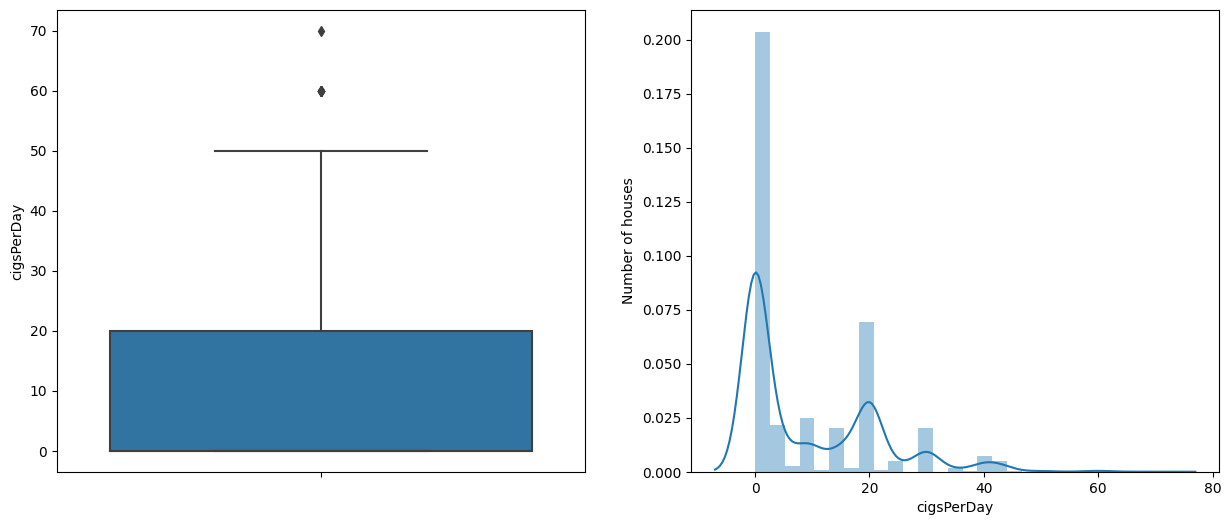

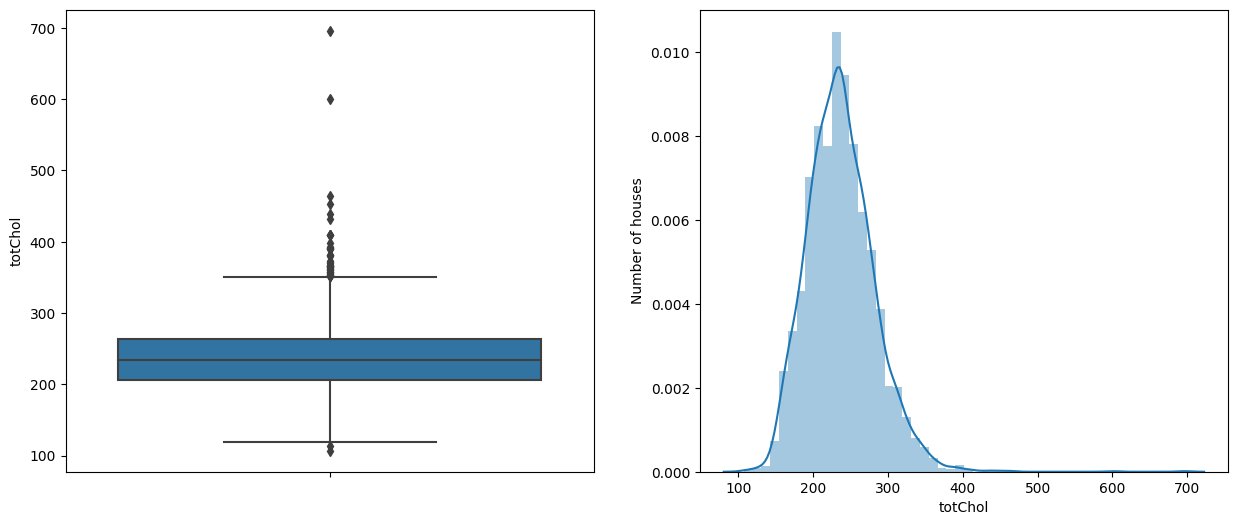

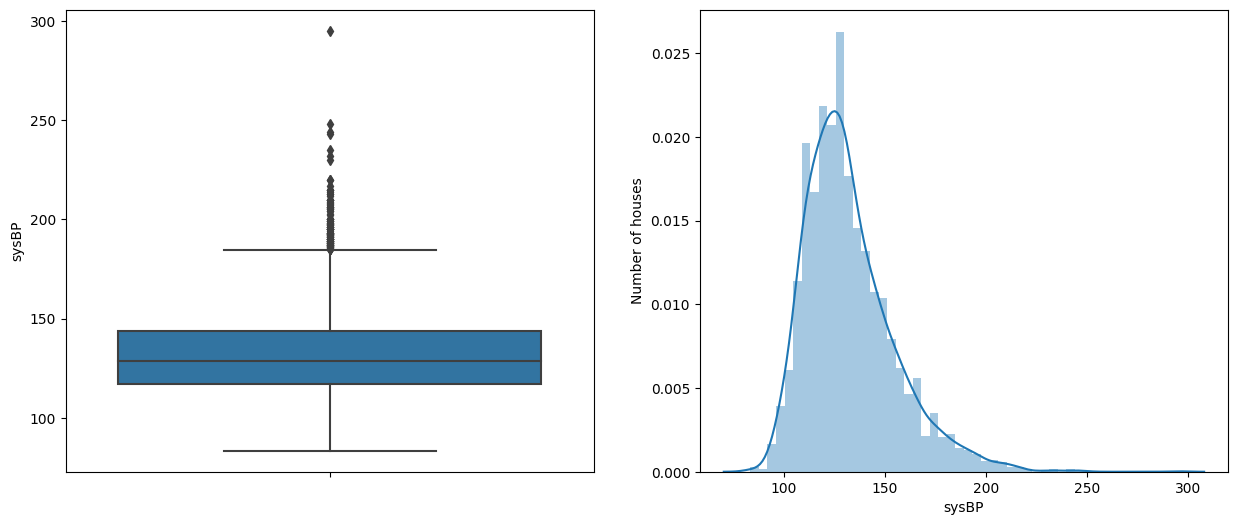

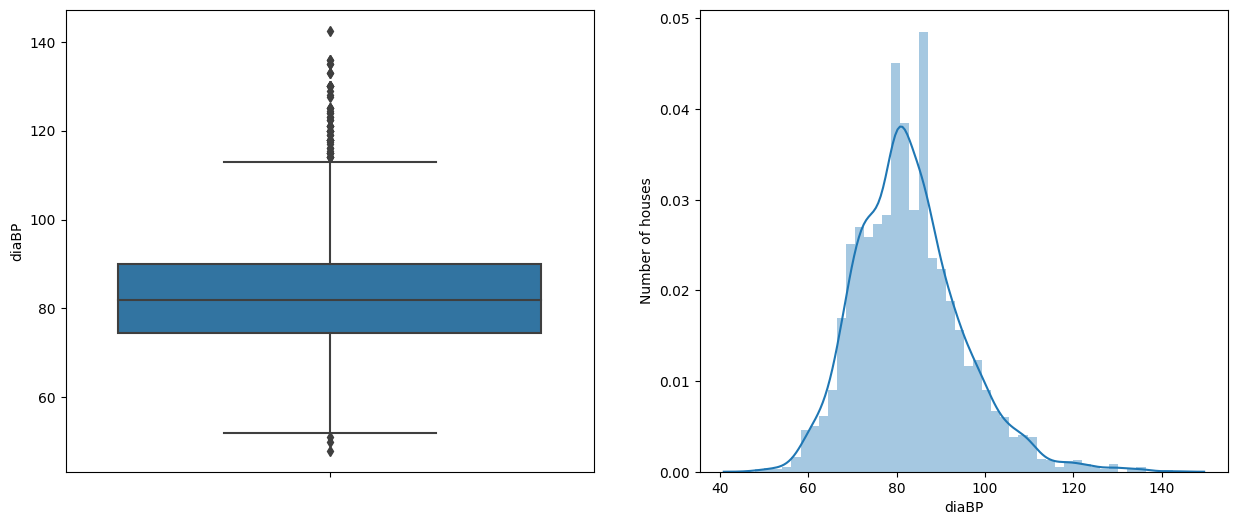

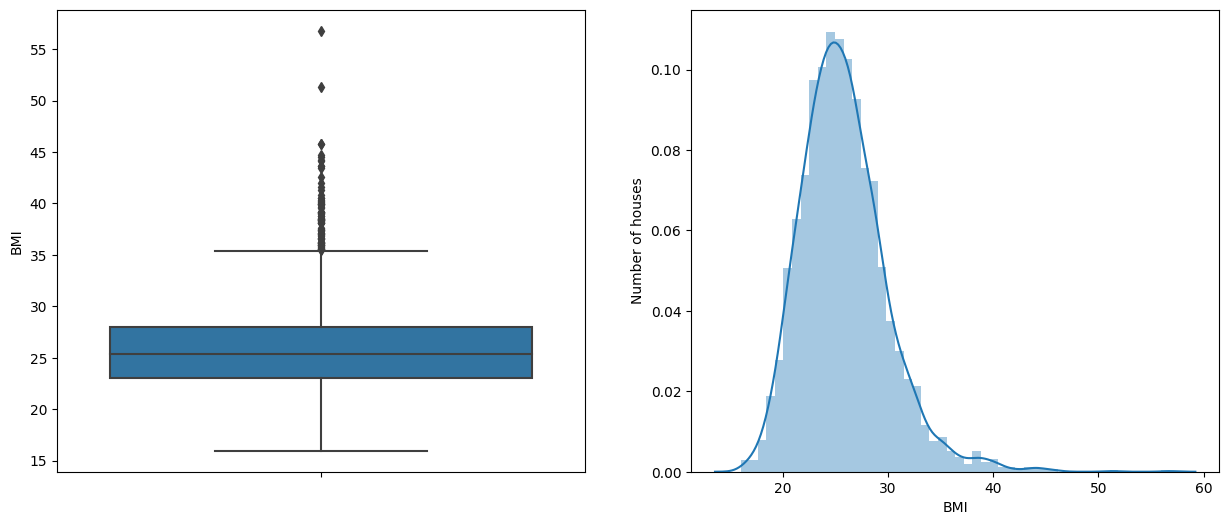

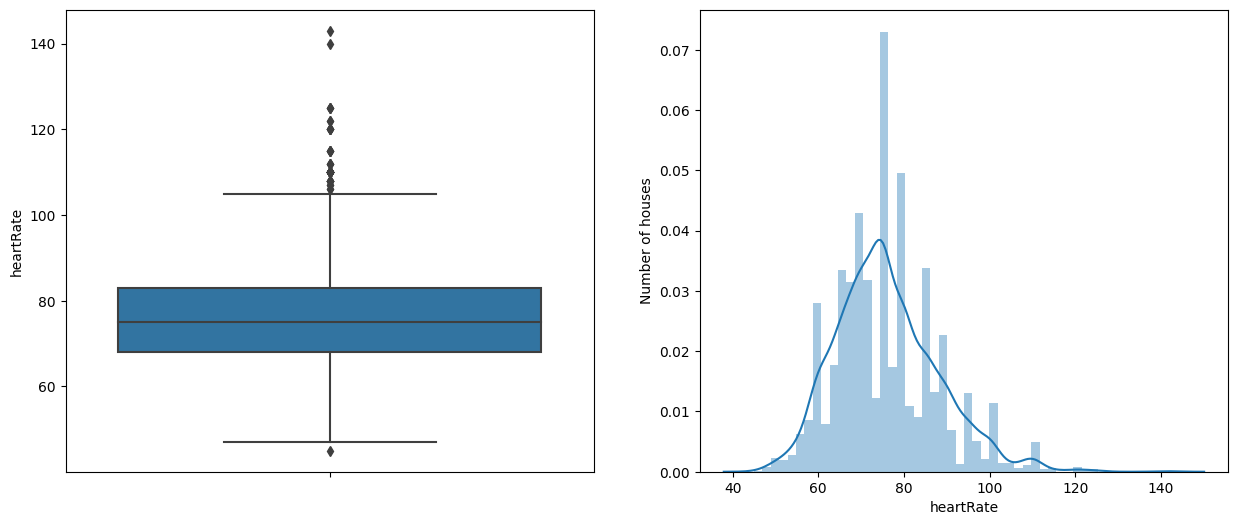

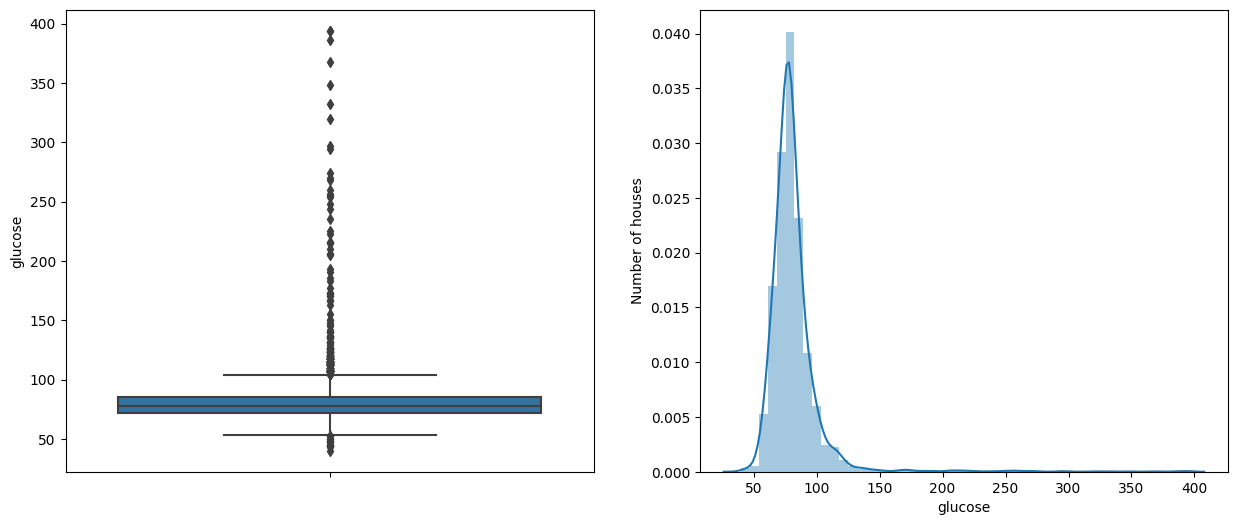

In [113]:
# Checking outliers
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In [176]:
# Handling Outliers & Outlier treatments

#Capping the outlier rows with Percentiles
for i in continuous:
  upper_lim = data[i].quantile(.95)
  lower_lim = data[i].quantile(.05)
  data.loc[(data[i] > upper_lim),i] = upper_lim
  data.loc[(data[i] < lower_lim),i] = lower_lim

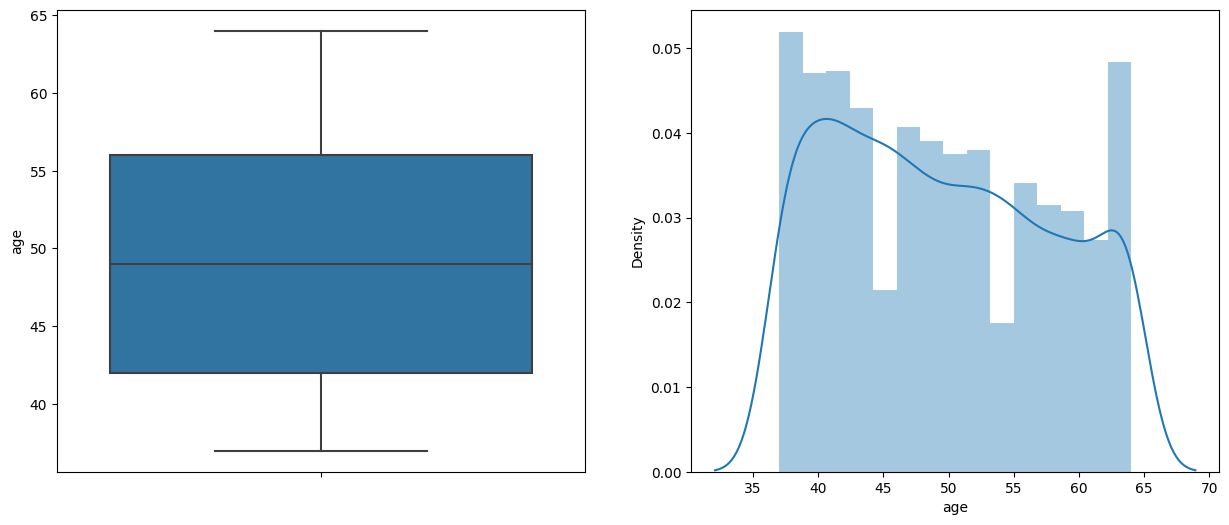

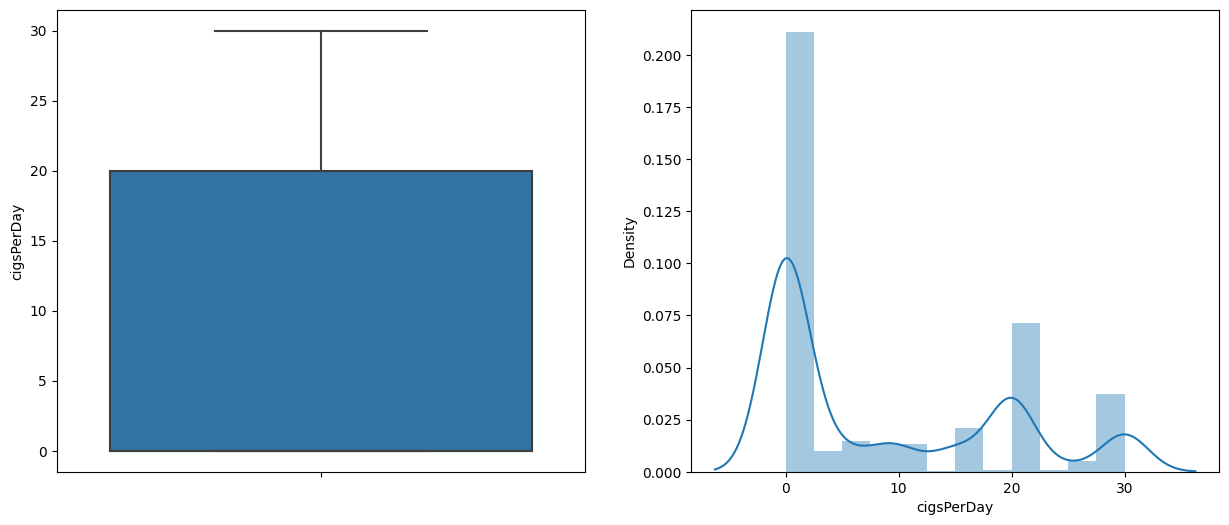

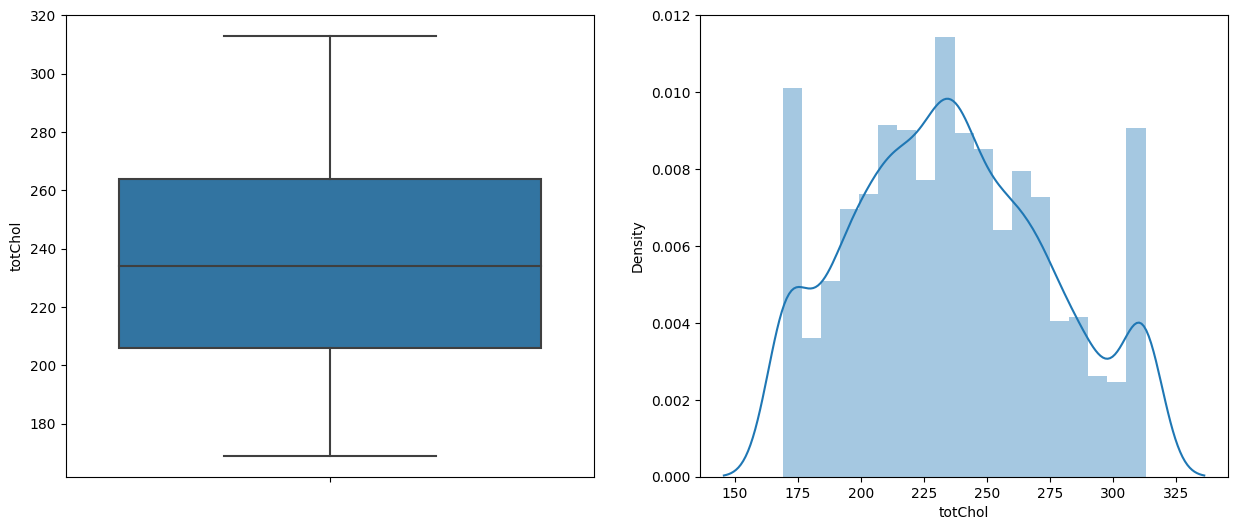

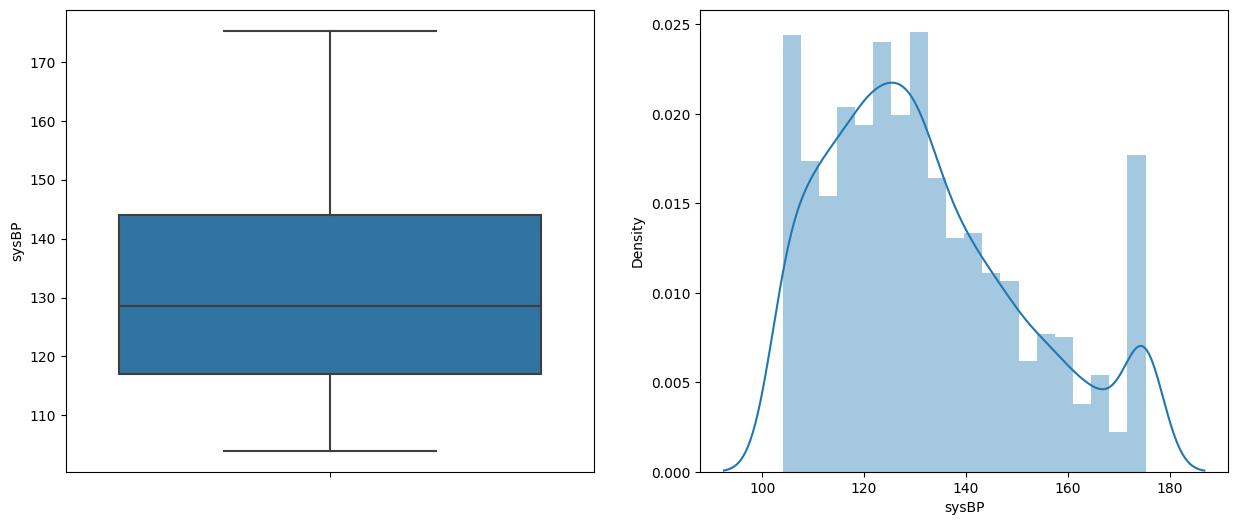

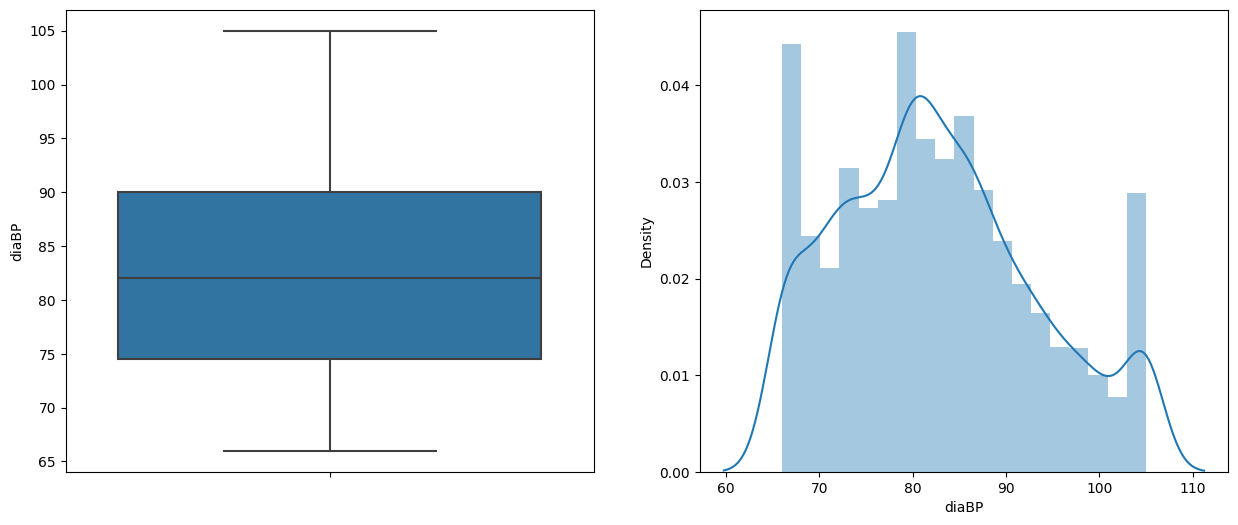

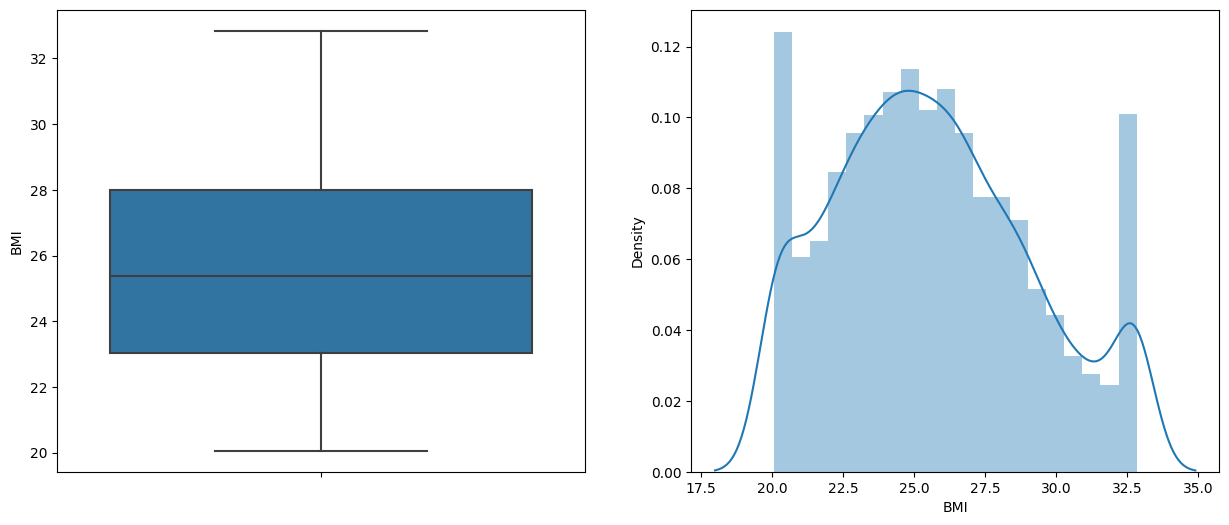

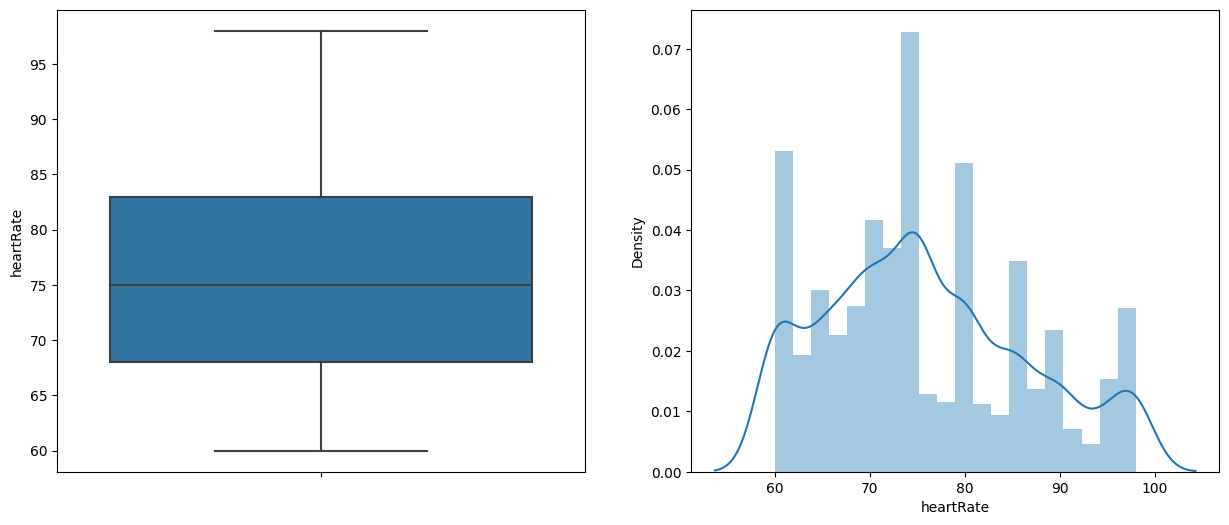

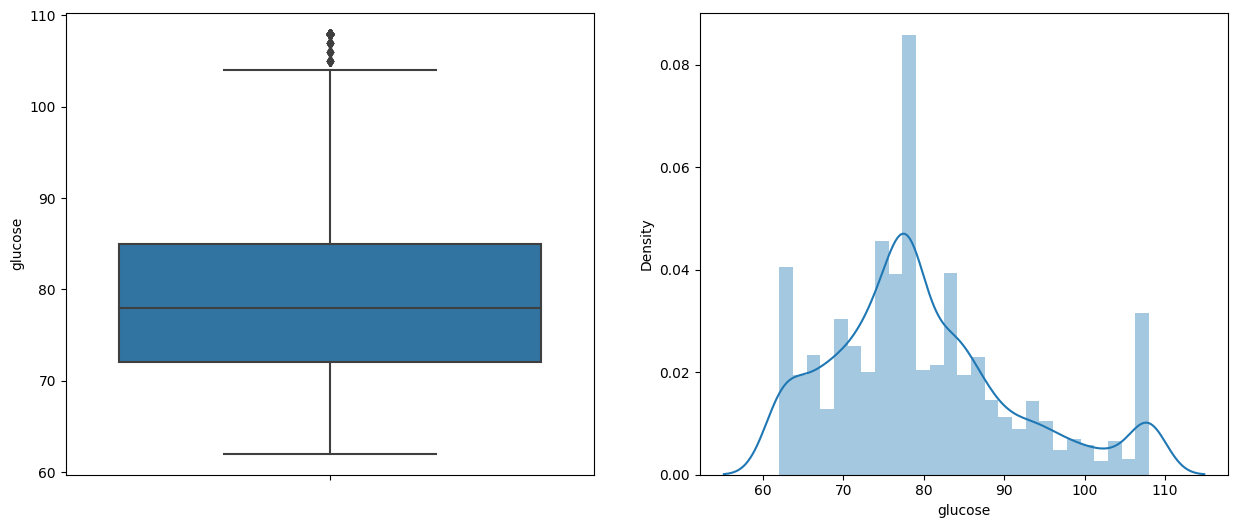

In [115]:
# Checking outliers
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_xlabel(var)

    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [177]:
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,37,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [156]:
# Encode your categorical columns

data['sex'] = data['sex'].apply(lambda x: 1 if x == 'M' else 0)

data['is_smoking'] = data['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [118]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [179]:
# Select your features wisely to avoid overfitting
x = data.drop(columns = ['TenYearCHD'], axis = 1)
y = data['TenYearCHD']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

feat_sel = SelectKBest(score_func=chi2, k=12)
bestv = feat_sel.fit(x,y)

KeyError: ignored

In [120]:
bsdf = pd.DataFrame({'features':x.columns,'scores': bestv.scores_})
bsdf.sort_values(by = 'scores',ascending = False)

,features,scores
10,sysBP,406.372135
0,age,235.378732
9,totChol,193.526116
4,cigsPerDay,182.092635
11,diaBP,78.647981
7,prevalentHyp,64.377708
8,diabetes,35.506306
14,glucose,32.820384
5,BPMeds,25.102438
6,prevalentStroke,15.861998


In [121]:
features = bsdf.sort_values(by = 'scores',ascending = False)['features'][:12]
features

10              sysBP
0                 age
9             totChol
4          cigsPerDay
11              diaBP
7        prevalentHyp
8            diabetes
14            glucose
5              BPMeds
6     prevalentStroke
2                 sex
12                BMI
Name: features, dtype: object

In [178]:
data = data[features]
data

,sysBP,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,glucose,BPMeds,prevalentStroke,sex,BMI
0,148.0,64,221.0,3.0,85.0,0,0,80.0,0.0,0,0,25.38
1,168.0,37,212.0,0.0,98.0,1,0,75.0,0.0,0,1,29.77
2,116.0,46,250.0,10.0,71.0,0,0,94.0,0.0,0,0,20.35
3,158.0,50,233.0,20.0,88.0,1,0,94.0,0.0,0,1,28.26
4,136.5,64,241.0,30.0,85.0,0,0,77.0,0.0,0,0,26.42
...,...,...,...,...,...,...,...,...,...,...,...,...
3385,123.5,60,261.0,0.0,79.0,0,0,103.0,0.0,0,0,29.28
3386,104.0,46,199.0,0.0,66.0,0,0,84.0,0.0,0,0,21.96
3387,164.0,44,313.0,3.0,105.0,1,0,72.0,0.0,0,1,28.92
3388,167.0,60,191.0,0.0,105.0,1,0,85.0,0.0,0,1,23.01


In [123]:
continuous = list(set(continuous)- set(['education', 'is_smoking','heartRate']))

In [124]:
continuous

['cigsPerDay', 'age', 'totChol', 'BMI', 'diaBP', 'glucose', 'sysBP']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [125]:
# Transform Your data
# data[continuous] = np.log(data[continuous]+1)

In [126]:
# for var in continuous:
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     fig = sns.boxplot(y=data[var])
#     fig.set_title('')
#     fig.set_ylabel(var)
    
#     plt.subplot(1, 2, 2)
#     fig = sns.distplot(data[var].dropna())
#     fig.set_xlabel(var)

#     plt.show()

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [127]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [162]:
# Split your data to train and test. Choose Splitting ratio wisely.

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.25 , random_state= 42, stratify = y)

##### What data splitting ratio have you used and why? 

Answer Here.

### 6. Data Scaling

In [169]:
# Scaling your data
mms = MinMaxScaler()

x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)


##### Which method have you used to scale you data and why?

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [130]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1


In [170]:
LogisticRegression,
# ML Model - 1 Implementation
lr = LogisticRegression()

# Fit the Algorithm
lr.fit(x_train, y_train)
# Predict on the model

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [171]:
accuracy_score(y_train, y_train_pred)

0.859504132231405

In [172]:
accuracy_score(y_test, y_test_pred)

0.8505701926858041

In [173]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[2153,    7],
       [ 373,   10]])

In [174]:

# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       719
           1       0.85      0.09      0.16       128

    accuracy                           0.86       847
   macro avg       0.85      0.54      0.54       847
weighted avg       0.86      0.86      0.81       847



In [175]:

# Printing classification of train set.
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2160
           1       0.59      0.03      0.05       383

    accuracy                           0.85      2543
   macro avg       0.72      0.51      0.48      2543
weighted avg       0.81      0.85      0.79      2543



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [137]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [138]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [139]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [140]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [141]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [142]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [143]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [144]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [145]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***